In [2]:
# Set plot size (for jupyter notebook)
options(repr.plot.width  = 4, repr.plot.height = 3)

In [13]:
library(RColorBrewer)
source('h_mdt.R')

library(xtable)
library(ggplot2)
theme_set(theme_bw())
library(ggpubr)
library(plyr)

Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs introduced by coercion"Warning message in eval(ei, envir):
"NAs

In [14]:
# Self defined functions for generating tables and histogram
tableGen <- function (v) {  
  sum.table.v <- c(summary(v), sd(v))
  sum.table.v <- data.frame(sum.table.v)
  rownames(sum.table.v) <- c("Min.","1st Qu.","Median","Mean",
                             "3rd Qu.","Max","Stand. Dev.")
  colnames(sum.table.v) <- "Value"
  return(sum.table.v)
}

histplot <- function (df, col=NULL, title='Histogram of Data') {
  col <- if (is.null(col))
    'Blues'
  else col
  df.shift <- df
  df.shift$Total[df.shift$Total == 100] <- 99
  ggplot(df.shift, aes(x=Total)) + 
    geom_histogram(aes(fill=..count..), bins=22, col="black", closed="right") + 
    scale_x_continuous(name = "Total score (0-100)",
                       breaks = seq(0, 100, 20), 
                       limits = c(-3,105)
                       ) + 
    scale_fill_gradient2(high=brewer.pal(5,col)) + 
    labs(title=title, subtitle=paste0("Total scores frequency: ", nrow(df), " students"))
}

In [15]:
## ----- Section 1.1 -----
df <- data.frame(Label = paste0('N',1:20), group_17)
# LaTeX: tab:EDA_groups
print(xtable(df, align=c('l','c','l','c')), include.rownames = F)

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Mon Feb 04 17:02:12 2019
\begin{table}[ht]
\centering
\begin{tabular}{clc}
  \hline
Label & Item & Type \\ 
  \hline
N1 & Q1 & A \\ 
  N2 & Q3 & B \\ 
  N3 & N3 & A \\ 
  N4 & Q5 & A \\ 
  N5 & Q6 & A \\ 
  N6 & Q7 & B \\ 
  N7 & N7 & B \\ 
  N8 & Q9 & A \\ 
  N9 & Q10 & B \\ 
  N10 & N10 & B \\ 
  N11 & N11 & C \\ 
  N12 & N12 & A \\ 
  N13 & Q13 & A \\ 
  N14 & Q14 & B \\ 
  N15 & Q15 & A \\ 
  N16 & Q16 & A \\ 
  N17 & Q17 & A \\ 
  N18 & Q18 & A \\ 
  N19 & Q19 & B \\ 
  N20 & Q20 & B \\ 
   \hline
\end{tabular}
\end{table}


In [16]:
tableGen(mdt17$Total)
tableGen(mdt18$Total)

,Value
Min.,0.00000
1st Qu.,57.75000
Median,72.88000
Mean,69.21834
3rd Qu.,84.50000
Max,100.00000
Stand. Dev.,20.42062


,Value
Min.,0.00000
1st Qu.,59.00000
Median,73.44000
Mean,69.71133
3rd Qu.,84.50000
Max,100.00000
Stand. Dev.,19.80904


In [17]:
## ----- Section 1.2.1 -----
# LaTeX: tab:EDA_dsc_17
print(xtable(tableGen(mdt17$Total), digits=c(0,2)))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Mon Feb 04 17:02:22 2019
\begin{table}[ht]
\centering
\begin{tabular}{rr}
  \hline
 & Value \\ 
  \hline
Min. & 0.00 \\ 
  1st Qu. & 57.75 \\ 
  Median & 72.88 \\ 
  Mean & 69.22 \\ 
  3rd Qu. & 84.50 \\ 
  Max & 100.00 \\ 
  Stand. Dev. & 20.42 \\ 
   \hline
\end{tabular}
\end{table}


Warning message:
"Removed 1 rows containing missing values (geom_bar)."

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

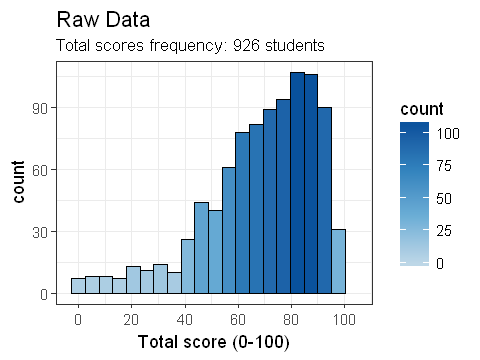

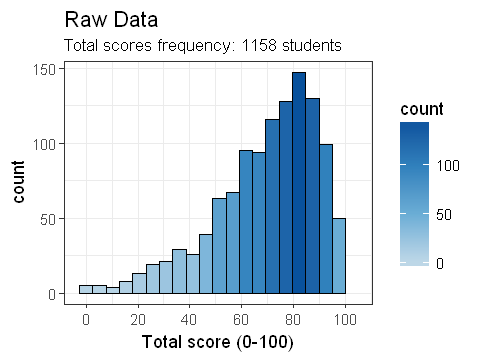

In [18]:
# pdf("../fig/EDA_hist_17.pdf", width=7, height=4)
histplot(mdt17fac, title='Raw Data')
histplot(mdt18fac, title='Raw Data')
# dev.off()

In [7]:
## ----- Section 1.2.2 -----
# LaTeX: tab:EDA_difficulty
print(xtable(t(colMeans(mdt17[1:10])), align=rep('c',11)))
print(xtable(t(colMeans(mdt17[11:20])), align=rep('c',11)))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:52 2018
\begin{table}[ht]
\centering
\begin{tabular}{ccccccccccc}
  \hline
 & Q1 & Q3 & N3 & Q5 & Q6 & Q7 & N7 & Q9 & Q10 & N10 \\ 
  \hline
1 & 4.44 & 3.60 & 4.06 & 3.94 & 1.74 & 3.79 & 1.89 & 4.22 & 3.64 & 2.01 \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:52 2018
\begin{table}[ht]
\centering
\begin{tabular}{ccccccccccc}
  \hline
 & N11 & N12 & Q13 & Q14 & Q15 & Q16 & Q17 & Q18 & Q19 & Q20 \\ 
  \hline
1 & 3.75 & 4.16 & 3.71 & 2.84 & 3.53 & 4.44 & 4.65 & 3.72 & 2.88 & 2.21 \\ 
   \hline
\end{tabular}
\end{table}


In [8]:
# LaTeX: tab:EDA_count_clean_legacy
print(xtable(data.frame(No.=c(nrow(mdt17fac), 
                              nrow(mdt17fac_nodup), 
                              nrow(mdt17fac)-nrow(mdt17_clean_legacy), 
                              nrow(mdt17_rm_legacy), 
                              nrow(mdt17_clean_legacy)))))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:52 2018
\begin{table}[ht]
\centering
\begin{tabular}{rr}
  \hline
 & No. \\ 
  \hline
1 & 926 \\ 
  2 & 917 \\ 
  3 &  42 \\ 
  4 &  33 \\ 
  5 & 884 \\ 
   \hline
\end{tabular}
\end{table}


Warning message:
"Removed 1 rows containing missing values (geom_bar)."

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

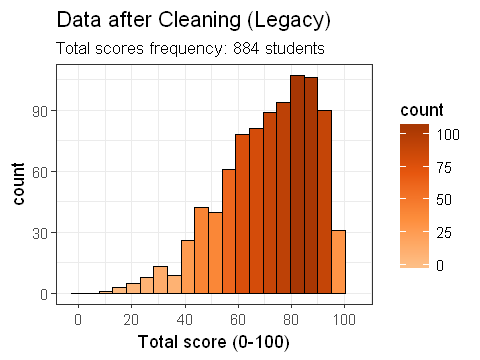

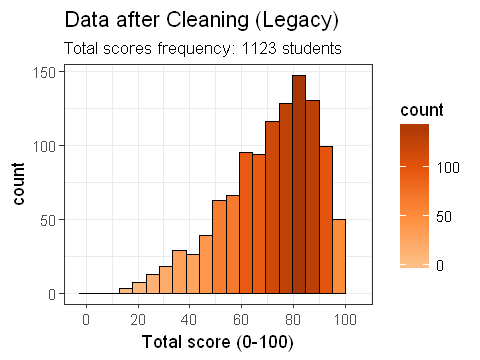

In [19]:
# pdf("../fig/EDA_hist_17clean_legacy.pdf", width=7, height=4)
histplot(mdt17_clean_legacy, 'Oranges', title='Data after Cleaning (Legacy)')
histplot(mdt18_clean_legacy, 'Oranges', title='Data after Cleaning (Legacy)')
# dev.off()

In [9]:
# LaTeX: tab:EDA_dsc_17clean_legacy
print(xtable(tableGen(mdt17_clean_legacy$Total), digits=c(0,2)))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:52 2018
\begin{table}[ht]
\centering
\begin{tabular}{rr}
  \hline
 & Value \\ 
  \hline
Min. & 12.50 \\ 
  1st Qu. & 60.00 \\ 
  Median & 73.94 \\ 
  Mean & 71.32 \\ 
  3rd Qu. & 85.00 \\ 
  Max & 100.00 \\ 
  Stand. Dev. & 17.53 \\ 
   \hline
\end{tabular}
\end{table}


In [20]:
## ----- Section 1.2.3 -----
# LaTeX: tab:EDA_validresp_legacy
print(xtable(t(as.data.frame(table(Valid.Response=rowSums(mdt17fac_nodup[row.names(mdt17_rm_legacy),]!='-')))), 
             align=c('r', rep('c',12))), 
      include.colnames=F)

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Mon Feb 04 17:04:32 2019
\begin{table}[ht]
\centering
\begin{tabular}{rcccccccccccc}
  \hline
  \hline
Valid.Response & 2 & 4 & 5 & 6 & 7 & 9 & 10 & 11 & 13 & 14 & 15 & 18 \\ 
  Freq & 2 & 4 & 5 & 5 & 2 & 1 & 2 & 3 & 2 & 5 & 1 & 1 \\ 
   \hline
\end{tabular}
\end{table}


ERROR: Error in `align<-.xtable`(`*tmp*`, value = switch(1 + is.null(align), : "align" must have length equal to 15 ( ncol(x) + 1 )


In [21]:
# Factor version scores of the removed student
# Sorted by number of '-'
arrange(mdt17fac_nodup[row.names(mdt17_rm_legacy),], rowSums(mdt17fac_nodup[row.names(mdt17_rm_legacy),]!='-'))

Q1,Q3,N3,Q5,Q6,Q7,N7,Q9,Q10,N10,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total,AnonID
-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0.00,5d9671ea
-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0.00,86f35c2f
-,0.00,-,-,-,-,5.00,-,-,-,...,-,-,-,-,-,-,-,-,5.00,25c3a4a9
-,0.00,-,-,-,-,-,0.00,-,-,...,-,-,-,-,-,-,-,-,0.00,9a536419
5.00,5.00,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,10.00,dd8defb6
5.00,0.00,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,5.00,fe4057d5
0.00,0.00,2.50,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2.50,11f6720d
5.00,0.00,1.25,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,6.25,19b9f7f6
5.00,5.00,3.75,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,13.75,64826c73
5.00,0.00,1.25,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,6.25,8e7cab64


In [13]:
# LaTeX: tab:EDA_count_clean
print(xtable(data.frame(No.=c(nrow(mdt17fac), 
                              nrow(mdt17fac_nodup), 
                              nrow(mdt17fac)-nrow(mdt17_clean), 
                              nrow(mdt17_rm), 
                              nrow(mdt17_clean)))))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:57 2018
\begin{table}[ht]
\centering
\begin{tabular}{rr}
  \hline
 & No. \\ 
  \hline
1 & 926 \\ 
  2 & 917 \\ 
  3 &  30 \\ 
  4 &  21 \\ 
  5 & 896 \\ 
   \hline
\end{tabular}
\end{table}


In [22]:
tableGen(mdt17_clean$Total)
tableGen(mdt18_clean$Total)
# LaTeX: tab:EDA_dsc_17clean
print(xtable(tableGen(mdt17_clean$Total), digits=c(0,2)))

,Value
Min.,5.00000
1st Qu.,59.50000
Median,73.75000
Mean,70.60683
3rd Qu.,85.00000
Max,100.00000
Stand. Dev.,18.46371


,Value
Min.,2.25000
1st Qu.,59.50000
Median,74.00000
Mean,70.81913
3rd Qu.,84.53250
Max,100.00000
Stand. Dev.,18.27066


% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Mon Feb 04 17:07:59 2019
\begin{table}[ht]
\centering
\begin{tabular}{rr}
  \hline
 & Value \\ 
  \hline
Min. & 5.00 \\ 
  1st Qu. & 59.50 \\ 
  Median & 73.75 \\ 
  Mean & 70.61 \\ 
  3rd Qu. & 85.00 \\ 
  Max & 100.00 \\ 
  Stand. Dev. & 18.46 \\ 
   \hline
\end{tabular}
\end{table}


Warning message:
"Removed 1 rows containing missing values (geom_bar)."

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

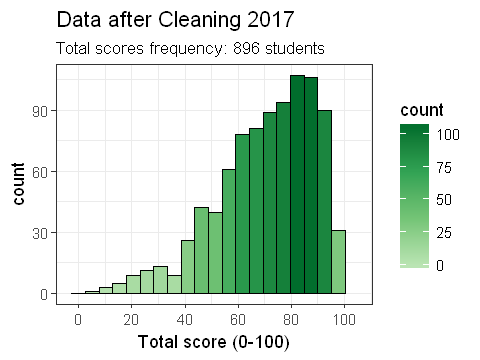

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

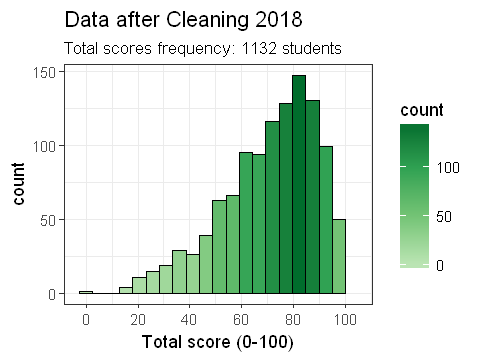

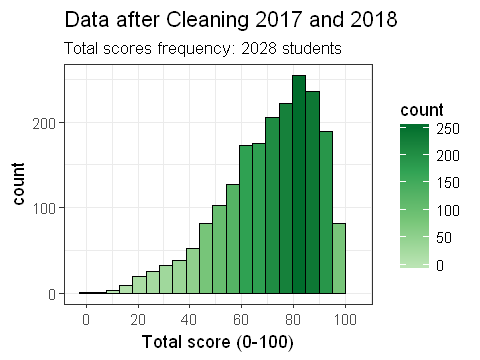

In [24]:
# pdf("../fig/EDA_hist_17clean.pdf", width=7, height=4)
histplot(mdt17_clean, 'Greens', title='Data after Cleaning 2017')
histplot(mdt18_clean, 'Greens', title='Data after Cleaning 2018')
histplot(rbind(mdt17_clean,mdt18_clean), 'Greens', title='Data after Cleaning 2017 and 2018')
# dev.off()

In [16]:
# LaTeX: tab:EDA_validresp
print(xtable(t(as.data.frame(table(Valid.Response=rowSums(mdt17fac_nodup[row.names(mdt17_rm),]!='-')))), 
             align=c('r', rep('c',8))), 
      include.colnames=F)

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:58 2018
\begin{table}[ht]
\centering
\begin{tabular}{rcccccccc}
  \hline
  \hline
Valid.Response & 2 & 4 & 5 & 6 & 7 & 9 & 10 & 11 \\ 
  Freq & 2 & 4 & 5 & 5 & 2 & 1 & 1 & 1 \\ 
   \hline
\end{tabular}
\end{table}


In [17]:
arrange(mdt17fac_nodup[row.names(mdt17_rm),], rowSums(mdt17fac_nodup[row.names(mdt17_rm),]!='-'))

Q1,Q3,N3,Q5,Q6,Q7,N7,Q9,Q10,N10,⋯,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total,AnonID
-,-,-,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,0.00,5d9671ea
-,-,-,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,0.00,86f35c2f
-,0.00,-,-,-,-,5.00,-,-,-,⋯,-,-,-,-,-,-,-,-,5.00,25c3a4a9
-,0.00,-,-,-,-,-,0.00,-,-,⋯,-,-,-,-,-,-,-,-,0.00,9a536419
5.00,5.00,-,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,10.00,dd8defb6
5.00,0.00,-,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,5.00,fe4057d5
0.00,0.00,2.50,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,2.50,11f6720d
5.00,0.00,1.25,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,6.25,19b9f7f6
5.00,5.00,3.75,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,13.75,64826c73
5.00,0.00,1.25,-,-,-,-,-,-,-,⋯,-,-,-,-,-,-,-,-,6.25,8e7cab64


In [18]:
## ----- Section 1.2.4 -----
# Confusion matrix
TP <- min(nrow(mdt17_rm), nrow(mdt17_rm_legacy))
FN <- nrow(mdt17_rm) - TP
FP <- nrow(mdt17_rm_legacy) - TP
TN <- nrow(mdt17_clean) - FP
cm <- as.table(matrix(c(TP, FP, FN, TN), ncol=2))
rownames(cm) <- c('Removed by new method', 'Kept by new method')
colnames(cm) <- c('Removed by old method', 'Kept by old method')
# LaTeX: tab:EDA_cm
print(xtable(addmargins(cm), digits=rep(0,4), align=c('r', rep('c',3))))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:58 2018
\begin{table}[ht]
\centering
\begin{tabular}{rccc}
  \hline
 & Removed by old method & Kept by old method & Sum \\ 
  \hline
Removed by new method & 21 & 0 & 21 \\ 
  Kept by new method & 12 & 884 & 896 \\ 
  Sum & 33 & 884 & 917 \\ 
   \hline
\end{tabular}
\end{table}


In [19]:
(ACC <- (TP+TN)/(TP+FN+FP+TN))

[1] 0.9869138

In [20]:
## ----- Section 1.3 -----
# LaTeX: tab:EDA_dsc_13to16_clean
tab.13to16 <- cbind(tableGen(mdt13_clean$Total), 
                   tableGen(mdt14_clean$Total), 
                   tableGen(mdt15_clean$Total), 
                   tableGen(mdt16_clean$Total))
colnames(tab.13to16) <- paste0('MDT2 (', 2013:2016, ')')
print(xtable(tab.13to16, digits=c(0,rep(2,4))))

% latex table generated in R 3.4.3 by xtable 1.8-2 package
% Fri Sep 21 12:39:58 2018
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & MDT2 (2013) & MDT2 (2014) & MDT2 (2015) & MDT2 (2016) \\ 
  \hline
Min. & 10.00 & 13.75 & 20.50 & 20.50 \\ 
  1st Qu. & 57.50 & 58.25 & 61.75 & 67.75 \\ 
  Median & 70.00 & 71.00 & 76.00 & 79.50 \\ 
  Mean & 68.96 & 69.56 & 72.93 & 77.15 \\ 
  3rd Qu. & 82.50 & 82.50 & 87.00 & 89.00 \\ 
  Max & 100.00 & 100.00 & 100.00 & 100.00 \\ 
  Stand. Dev. & 17.79 & 17.53 & 17.41 & 15.41 \\ 
   \hline
\end{tabular}
\end{table}


Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

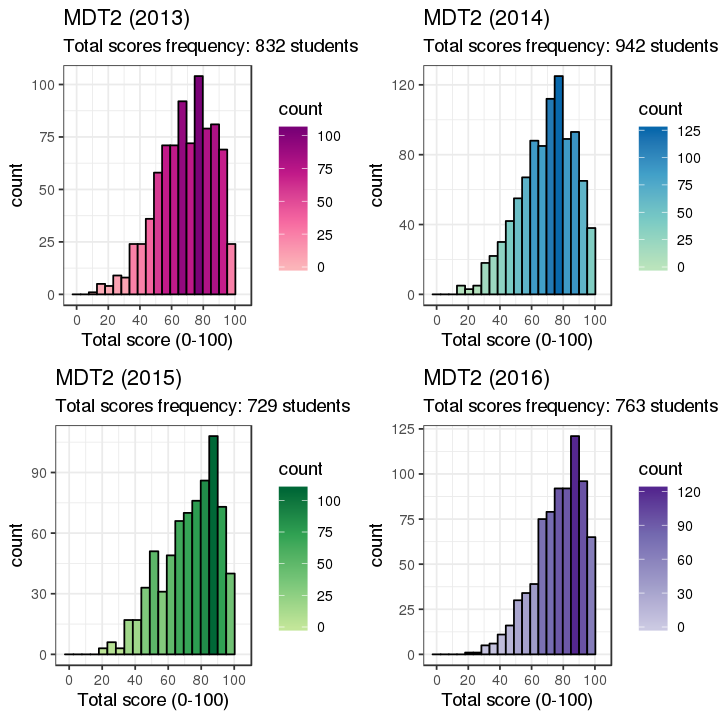

In [24]:
p1 <- histplot(mdt13_clean, 'RdPu', title='MDT2 (2013)')
p2 <- histplot(mdt14_clean, 'GnBu', title='MDT2 (2014)')
p3 <- histplot(mdt15_clean, 'YlGn', title='MDT2 (2015)')
p4 <- histplot(mdt16_clean, 'Purples', title='MDT2 (2016)')
options(repr.plot.width  = 6, repr.plot.height = 6)
# pdf('../fig/EDA_hist_13to16_clean.pdf', width=7, height=6, onefile=F)
ggarrange(p1, p2, p3, p4)
# dev.off()
options(repr.plot.width  = 4, repr.plot.height = 3)